In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATASET_PATH = '../Datasets/'

def load_data(dataset):
    '''Load dataset, return pd.DataFrame

    - Reduce chance of errors incase of missing files or filepaths
    '''
    possible_paths = [dataset, os.path.join(DATASET_PATH, dataset)]
    for path in possible_paths:
        if os.path.exists(path):
            return pd.read_csv(path)
    print(f"File {dataset} not found in any of the specified paths")
    return None

kenya_df = load_data('kenya_data_protection_act3.csv')
kenya_df.head()

,Category,Description,Section in Act,Key Points
0,"(Lawfulness, Fairness, Transparency)","Data processing must be lawful, fair, and tran...",Section 25,Must collect data based on consent or legal ne...
1,Purpose Limitation,"Data should be collected for a specific, legit...",Section 26(a),No use of data for purposes beyond what is exp...
2,Data Minimization,Only collect the data that is necessary for th...,Section 26(b),Avoid excessive data collection
3,Accuracy,Personal data must be accurate and kept up to ...,Section 26(c),Incorrect or outdated data should be corrected...
4,Storage Limitation,Data should only be stored for as long as nece...,Section 26(d),Retain data only for the duration necessary fo...


In [3]:
gdpr_df = load_data('gdpr4.csv')
gdpr_df.head()

,Category,Description,GDPR Articles,Recitals,Unnamed: 4
0,Personal Data,(Information relating to an identifiable perso...,Article 4,NaN,
1,Processing Data,(Any operation performed on personal data e.g....,Article 4(2),,NaN
2,Consent,"(Freely given, specific, informed, and unambig...",Article 7,Recital 32,NaN
3,Sensitive Data,"(Data concerning racial/ethnic origin, politic...",Article 9,NaN,NaN
4,Data Minimization,"(Personal data must be adequate, relevant and ...",Article 5(1)(c),,NaN


#### GDPR Data Preprocessing

In [4]:
gdpr_df.drop(columns=['Unnamed: 4', 'Recitals'], inplace=True)
gdpr_df.columns

Index(['Category', 'Description', 'GDPR Articles'], dtype='object')

In [5]:
gdpr_df.shape

(32, 3)

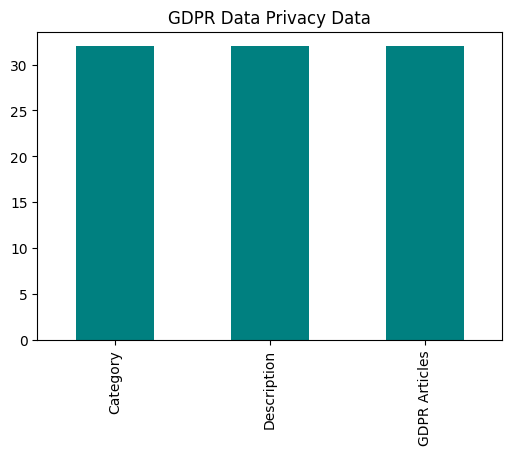

In [6]:
gdpr_df.count().plot(kind='bar', figsize=(6, 4), title='GDPR Data Privacy Data', color='teal')
plt.show()

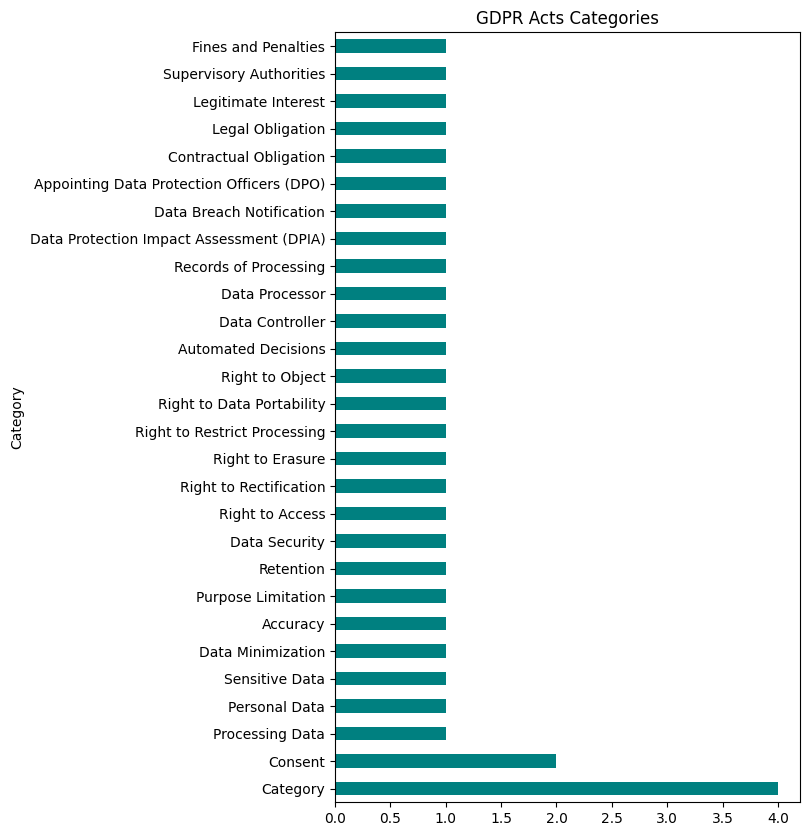

In [7]:
gdpr_df["Category"].value_counts().plot(kind='barh', figsize=(6, 10), title='GDPR Acts Categories', color='teal')
plt.show()

In [8]:
gdpr_df.Category.unique()

array(['Personal Data', 'Processing Data', 'Consent', 'Sensitive Data',
       'Data Minimization', 'Purpose Limitation', 'Accuracy', 'Retention',
       'Data Security', 'Category', 'Right to Access',
       'Right to Rectification', 'Right to Erasure',
       'Right to Restrict Processing', 'Right to Data Portability',
       'Right to Object', 'Automated Decisions', 'Data Controller',
       'Data Processor', 'Records of Processing',
       'Data Protection Impact Assessment (DPIA)',
       'Data Breach Notification',
       'Appointing Data Protection Officers (DPO)',
       'Contractual Obligation', 'Legal Obligation',
       'Legitimate Interest', 'Supervisory Authorities',
       'Fines and Penalties'], dtype=object)

In [9]:
description = gdpr_df['Description'].to_list()
for i in range(len(description)):
    print(description[i])

(Information relating to an identifiable person e.g. names, ID numbers,location data)
(Any operation performed on personal data e.g. collection, storage)
(Freely given, specific, informed, and unambiguous consent)
(Data concerning racial/ethnic origin, political opinions, religious beliefs, health)
(Personal data must be adequate, relevant and limited to what is necessary)
(Collected for specified, explicit, and legitimate purposes)
Personal data must be accurate and kept up-to-date
Personal data should be kept only as long as necessary
(Appropriate measures to prevent unauthorized access loss or disclosure)
Description
Right to know what personal data is being processed and why
Right to correct inaccurate or incomplete data
Right to request deletion of data under specific conditions
Right to limit the processing of personal data
(Right to receive personal data in a structured machine-readable format)
Right to object to data processing for legitimate reasons
Right not to be subject to 

In [10]:
gdpr_df.loc[gdpr_df['Description'] == 'Description']

,Category,Description,GDPR Articles
9,Category,Description,GDPR Articles
17,Category,Description,GDPR Articles
24,Category,Description,GDPR Articles
29,Category,Description,GDPR Articles


In [11]:
gdpr_df.drop(index=[9, 17, 24, 29], inplace=True)

In [12]:
gdpr_df.loc[gdpr_df['Description'] == 'Description']

,Category,Description,GDPR Articles


In [13]:
gdpr_df['Description'].nunique()

28

In [14]:
gdpr_df.isna().sum()

Category         0
Description      0
GDPR Articles    0
dtype: int64

In [15]:
len(gdpr_df)

28

In [16]:
gdpr_df.loc[gdpr_df['Category'] == 'Category']

,Category,Description,GDPR Articles


In [17]:
gdpr_df.reset_index(drop=True, inplace=True)

In [18]:
gdpr_df.to_csv(f"{DATASET_PATH}gdpr_clean.csv", index=False)

#### Kenya Data Privacy Policy Preprocessing

In [19]:
len(kenya_df)

48

In [20]:
len(kenya_df.Category)

48

In [21]:
len(kenya_df.Category.unique())

41

In [22]:
kenya_df.loc[kenya_df['Category'] == 'Category']

,Category,Description,Section in Act,Key Points
7,Category,Description,Section in Act,Key Points
14,Category,Description,Section in Act,Key Points
21,Category,Description,Section in Act,Key Points
26,Category,Description,Section in Act,Penalties
32,Category,Description,Section in Act,Key Points
37,Category,Description,Section in Act,Key Points
40,Category,Description,Section in Act,Key Points
43,Category,Description,Section in Act,Key Points


In [23]:
kenya_df.drop(index=[7, 14, 21, 26, 32, 37, 40, 43], inplace=True)
kenya_df.loc[kenya_df['Category'] == 'Category']

,Category,Description,Section in Act,Key Points


In [24]:
kenya_df.isna().sum()

Category          0
Description       0
Section in Act    0
Key Points        0
dtype: int64

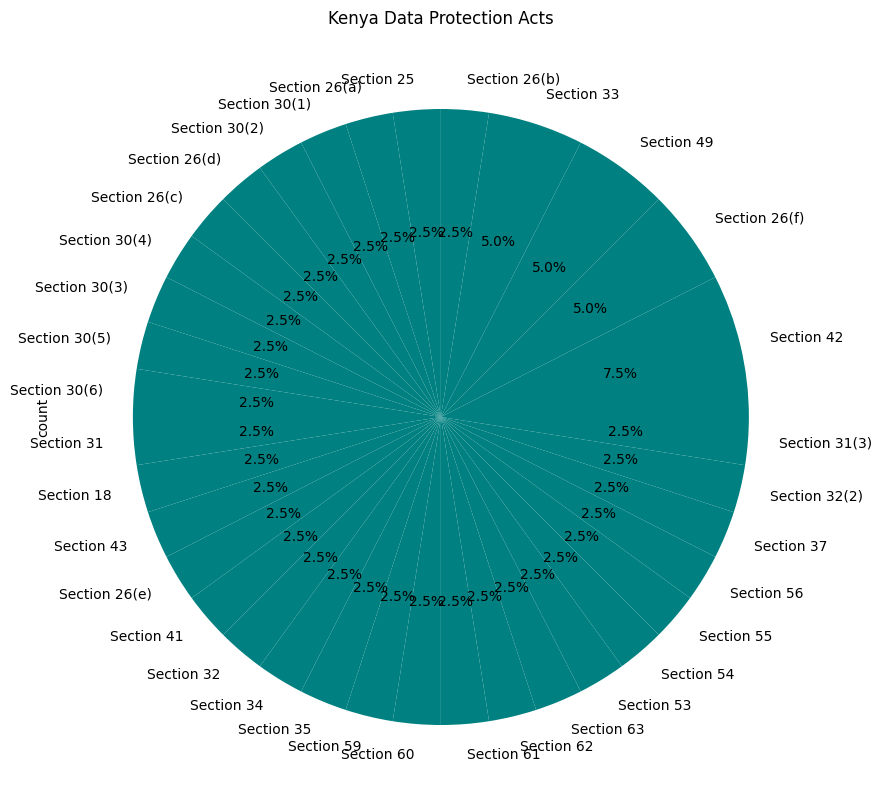

In [25]:
kenya_df["Section in Act"].value_counts().plot(kind='pie', figsize=(10, 10), title='Kenya Data Protection Acts', autopct='%1.1f%%', colors=['teal'])
plt.show()

In [26]:
kenya_df.loc[kenya_df['Section in Act'] == 'Section 42']

,Category,Description,Section in Act,Key Points
19,Third-Party Contracts,Ensure contracts with third parties follow dat...,Section 42,Processors must follow controllers’ instructio...
38,Data Sharing with Third Parties,Data controllers must ensure that third-party ...,Section 42,Third parties must adhere to same data protect...
46,Data Processing Agreements,Controllers must have formal agreements with p...,Section 42,Processors must follow the instructions of con...


In [27]:
kenya_df.reset_index(drop=True, inplace=True)

In [28]:
kenya_df.to_csv(f"{DATASET_PATH}kenya_clean.csv", index=False)

In [29]:
len(kenya_df)

40

In [30]:
kenya_df.nunique()

Category          40
Description       40
Section in Act    35
Key Points        40
dtype: int64

### Model Creation

> Due to the size of the model, we use the entire dataset to train it to have optimal observatios made.

In [31]:
from torch import nn
import torch
from transformers import BertTokenizer, BertModel
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib

MODEL_PATH = "./Saved_model/"

# Combine all text features into a single feature for vectorization
kenya_df.loc[:, 'combined_text'] = kenya_df['Category'] + ' ' + kenya_df['Description'] + ' ' + kenya_df['Key Points']

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

def tokenize_text_data(text):
    '''Tokenizes all text data in a specified column of a DataFrame

    - df: pd.DataFrame
    - column_name: str
    Return DataFrame with tokenized text
    '''
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply the tokenization function to the combined text
kenya_df.loc[:, "embeddings"] = kenya_df["combined_text"].apply(tokenize_text_data)

# Encode the target variables
label_encoders = {}
for column in ['Category', 'Description', 'Section in Act', 'Key Points']:
    le = LabelEncoder()
    kenya_df.loc[:, column] = le.fit_transform(kenya_df[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X = np.array(kenya_df['embeddings'].tolist())
y = kenya_df[['Category', 'Description', 'Section in Act', 'Key Points']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output regressor
regressor = MultiOutputRegressor(LinearRegression())

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Decode the predictions back to original labels
for i in range(len(X_test)):
    print(f"Input: {X_test[i]}")
    print(f"Predicted Category: {label_encoders['Category'].inverse_transform([int(y_pred[i][0])])[0]}")
    print(f"Predicted Description: {label_encoders['Description'].inverse_transform([int(y_pred[i][1])])[0]}")
    print(f"Predicted Section in Act: {label_encoders['Section in Act'].inverse_transform([int(y_pred[i][2])])[0]}")
    print(f"Predicted Key Points: {label_encoders['Key Points'].inverse_transform([int(y_pred[i][3])])[0]}")
    print()
    # Save the trained model
    # Create directory if it does not exist
    os.makedirs(MODEL_PATH, exist_ok=True)
    joblib.dump(regressor, f"{MODEL_PATH}kenya_data_protection_model.pkl")

    # Save the label encoders
    for column, le in label_encoders.items():
        joblib.dump(le, f"{MODEL_PATH}{column}_label_encoder.pkl")

Input: [ 1.74105465e-01  3.78679782e-01  2.26535037e-01  1.27308726e-01
  1.65473416e-01 -2.29529321e-01  2.79214501e-01  1.67270780e-01
  7.69414157e-02 -1.06288753e-02 -2.37032533e-01  1.20747894e-01
  8.24648812e-02  2.64357775e-01 -1.93106517e-01  3.00540626e-01
  1.05800167e-01  2.36242265e-02  7.09194466e-02 -2.84200281e-01
 -3.60365473e-02 -1.85186282e-01 -2.83777267e-01  2.13299915e-01
  6.35066986e-01  1.09208271e-01  1.83639586e-01 -5.33525273e-02
 -2.75428407e-02 -3.55962694e-01  3.67944837e-01  2.68282235e-01
 -1.58733666e-01 -7.22437426e-02  1.71639860e-01  4.81913447e-01
 -6.26555383e-02 -1.51074186e-01 -6.31846726e-01 -1.23050679e-02
 -7.98027694e-01 -3.22762847e-01 -3.54073457e-02 -1.92338094e-01
 -7.40067801e-03 -4.01904285e-01  3.11808288e-01  1.91148952e-01
  6.23743124e-02  2.19013244e-01 -7.95099914e-01 -1.92930922e-02
 -4.72306937e-01  2.78894365e-01  2.98384398e-01  4.46286619e-01
  3.35565731e-02 -9.23826039e-01 -2.03486741e-01 -3.54935564e-02
  2.37790227e-01 -

In [32]:
for i in range(len(X_test)):
    print(f"Input: {kenya_df.loc[kenya_df['embeddings'].apply(lambda x: np.allclose(x, X_test[i]))]['combined_text'].values[0]}")
    print(f"Predicted Category: {label_encoders['Category'].inverse_transform([int(y_pred[i][0])])[0]}")
    print(f"Predicted Description: {label_encoders['Description'].inverse_transform([int(y_pred[i][1])])[0]}")
    print(f"Predicted Section in Act: {label_encoders['Section in Act'].inverse_transform([int(y_pred[i][2])])[0]}")
    print(f"Predicted Key Points: {label_encoders['Key Points'].inverse_transform([int(y_pred[i][3])])[0]}")
    print()

Input: Consent-based Processing Data processing must be based on the data subject’s explicit consent Consent must be informed, freely given, and specific
Predicted Category: Cross-border Data Transfers
Predicted Description: Data for research purposes must ensure anonymization when possible
Predicted Section in Act: Section 30(5)
Predicted Key Points: Processors must follow controllers’ instructions and data protection rules

Input: Notification of Breaches Notify the Data Commissioner and affected individuals in case of data breaches Breaches must be reported within 72 hours
Predicted Category: Data Protection Impact Assessments (DPIAs)
Predicted Description: Failure to register as a data controller or processor
Predicted Section in Act: Section 42
Predicted Key Points: Data must be erased upon the data subject’s request, if lawful

Input: Security Measures Implement adequate security measures to protect personal data Includes encryption, pseudonymization, and physical security
Predic